# Diseño de amplificador

## VFA VFA

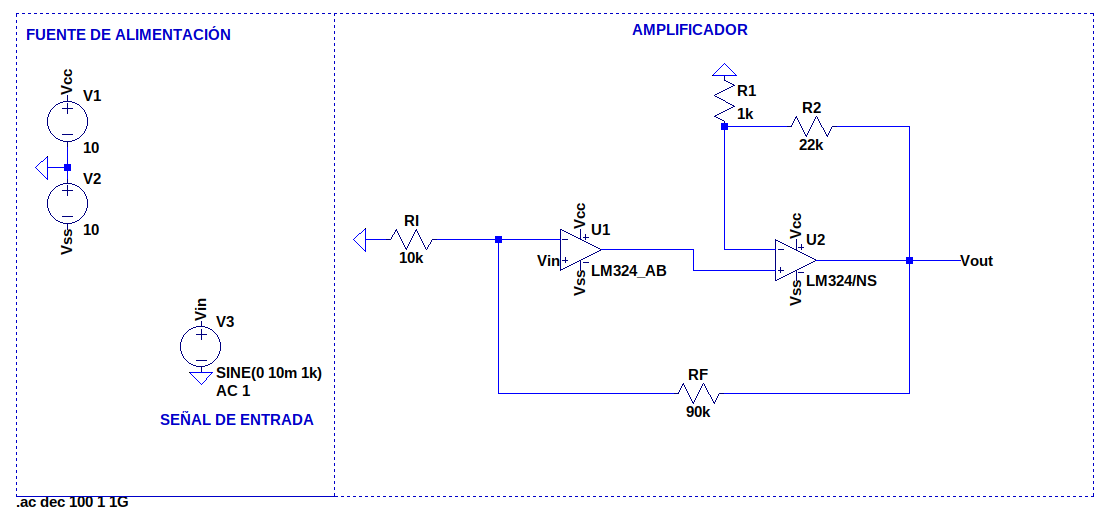

Partiendo de los datos que nos entrega el fabbricante  del LM324: 

- Ao = 100dB
- GBP = 1MHz
- SR = 0.5V/µs
- f1 = 10Hz
- f2 = 5.06 MHz
- Vout max = 12Vpp

Tenemos el siguiente modelo de dos polos para el amplificador operacional en lazo abierto:
$$A_{OL}(s) = \frac{A_0}{(1+\frac{s}{\omega_1})(1+\frac{s}{\omega_2})}$$

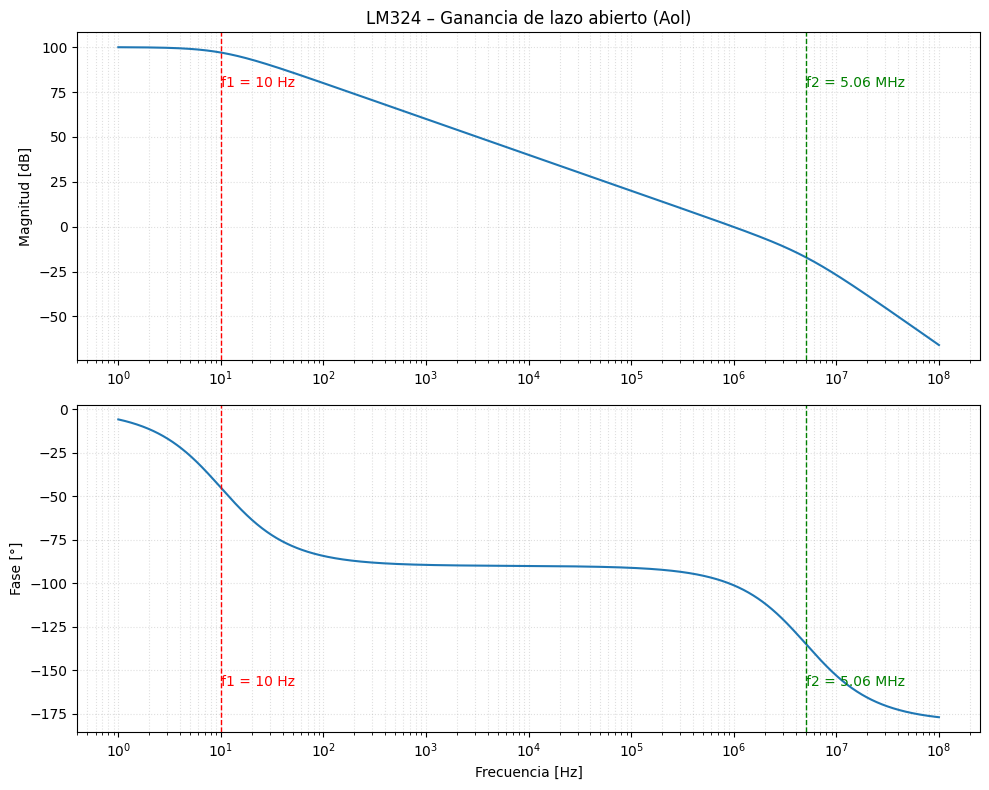

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros LM324 (modelo de la cátedra)
A0 = 1e5        # ganancia DC
f1 = 10         # Hz (polo dominante)
f2 = 5.06e6     # Hz (segundo polo)
w1 = 2*np.pi*f1
w2 = 2*np.pi*f2

# Barrido de frecuencias
f = np.logspace(0, 8, 2000)   # 1 Hz a 100 MHz para ver margen más cómodo
w = 2*np.pi*f
s = 1j*w

# Función de transferencia a lazo abierto
A_ol = A0 / ((1 + s/w1)*(1 + s/w2))

mag_ol = 20*np.log10(np.abs(A_ol))
phase_ol = np.angle(A_ol, deg=True)

# --- Plot ---
plt.figure(figsize=(10,8))

# ======================
#       Módulo
# ======================
plt.subplot(2,1,1)
plt.semilogx(f, mag_ol, label='|A_ol(jw)|')
plt.axvline(f1, color='red', linestyle='--', linewidth=1)
plt.axvline(f2, color='green', linestyle='--', linewidth=1)

plt.text(f1, mag_ol.max()-20, 'f1 = 10 Hz', color='red', ha='left', va='center')
plt.text(f2, mag_ol.max()-20, 'f2 = 5.06 MHz', color='green', ha='left', va='center')

plt.ylabel('Magnitud [dB]')
plt.title('LM324 – Ganancia de lazo abierto (Aol)')
plt.grid(True, which='both', ls=':', alpha=0.4)

# ======================
#       Fase
# ======================
plt.subplot(2,1,2)
plt.semilogx(f, phase_ol, label='∠A_ol(jw)')
plt.axvline(f1, color='red', linestyle='--', linewidth=1)
plt.axvline(f2, color='green', linestyle='--', linewidth=1)

plt.text(f1, phase_ol.min()+20, 'f1 = 10 Hz', color='red', ha='left', va='center')
plt.text(f2, phase_ol.min()+20, 'f2 = 5.06 MHz', color='green', ha='left', va='center')

plt.ylabel('Fase [°]')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True, which='both', ls=':', alpha=0.4)

plt.tight_layout()
plt.show()



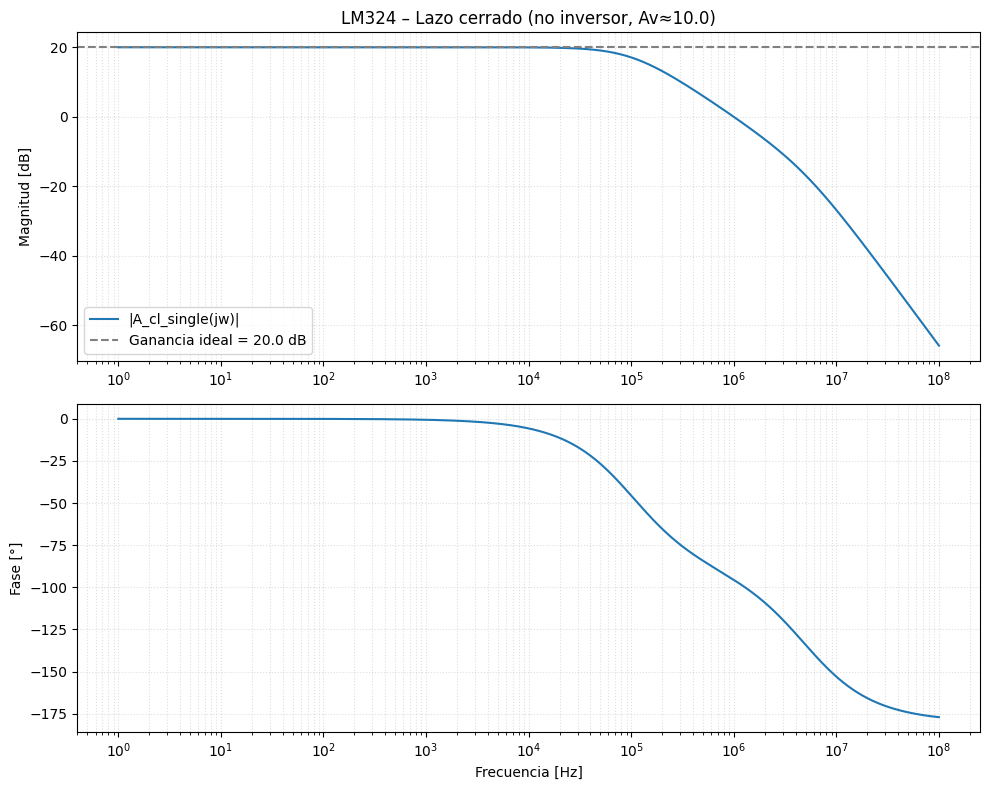

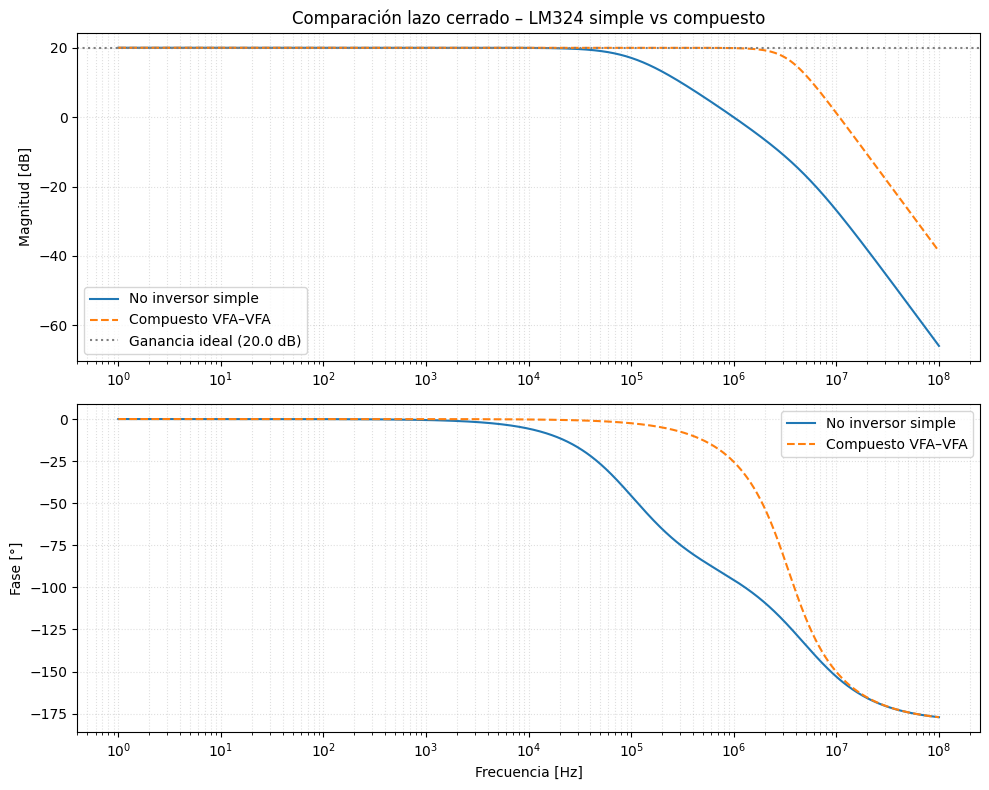

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros LM324
A0 = 1e5        # ganancia DC
f1 = 10         # Hz (polo dominante)
f2 = 5.06e6     # Hz (segundo polo)
w1 = 2*np.pi*f1
w2 = 2*np.pi*f2

# Barrido de frecuencias
f = np.logspace(0, 8, 2000)   # 1 Hz a 100 MHz
w = 2*np.pi*f
s = 1j*w

# Ganancia a lazo abierto de UN LM324
A_ol = A0 / ((1 + s/w1)*(1 + s/w2))

# -----------------------------
#  Parámetros de realimentación
# -----------------------------
Ri = 10e3    # resistencia a masa (global)
Rf = 90e3    # realimentación global
beta = Ri / (Ri + Rf)   # factor de realimentación global
Av_ideal = 1 + Rf/Ri    # ganancia ideal del no inversor

# Segunda etapa local (ganancia fija)
R1 = 1e3     # a masa
R2 = 22e3    # realimentación local
G2 = 1 + R2/R1   # ganancia local del segundo AO (aprox. constante)

# -----------------------------
#  Lazo cerrado: un solo LM324
# -----------------------------
A_cl_single = A_ol / (1 + beta * A_ol)

mag_single = 20*np.log10(np.abs(A_cl_single))
phase_single = np.angle(A_cl_single, deg=True)

# -----------------------------
#  Lazo cerrado: amplificador compuesto VFA–VFA
# -----------------------------
G_comp = G2 * A_ol                # bloque de lazo (primer AO * ganancia local)
A_cl_comp = G_comp / (1 + beta * G_comp)

mag_comp = 20*np.log10(np.abs(A_cl_comp))
phase_comp = np.angle(A_cl_comp, deg=True)

# =====================================================
#   FIGURA 1 – LM324 no inversor (lazo cerrado simple)
# =====================================================
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.semilogx(f, mag_single, label='|Acl(jw)|')
plt.axhline(20*np.log10(Av_ideal), color='gray', linestyle='--',
            label='Ganancia ideal = %.1f dB' % (20*np.log10(Av_ideal)))
plt.ylabel('Magnitud [dB]')
plt.title('LM324 – Lazo cerrado (no inversor, Av≈%.1f)' % Av_ideal)
plt.grid(True, which='both', ls=':', alpha=0.4)
plt.legend()

plt.subplot(2,1,2)
plt.semilogx(f, phase_single)
plt.ylabel('Fase [°]')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True, which='both', ls=':', alpha=0.4)

plt.tight_layout()
plt.show()

# =====================================================
#   FIGURA 2 – Comparación: simple vs compuesto
# =====================================================
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.semilogx(f, mag_single, label='No inversor simple')
plt.semilogx(f, mag_comp, '--', label='Compuesto VFA–VFA')
plt.axhline(20*np.log10(Av_ideal), color='gray', linestyle=':',
            label='Ganancia ideal (%.1f dB)' % (20*np.log10(Av_ideal)))
plt.ylabel('Magnitud [dB]')
plt.title('Comparación lazo cerrado – LM324 simple vs compuesto')
plt.grid(True, which='both', ls=':', alpha=0.4)
plt.legend()

plt.subplot(2,1,2)
plt.semilogx(f, phase_single, label='No inversor simple')
plt.semilogx(f, phase_comp, '--', label='Compuesto VFA–VFA')
plt.ylabel('Fase [°]')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True, which='both', ls=':', alpha=0.4)
plt.legend()

plt.tight_layout()
plt.show()


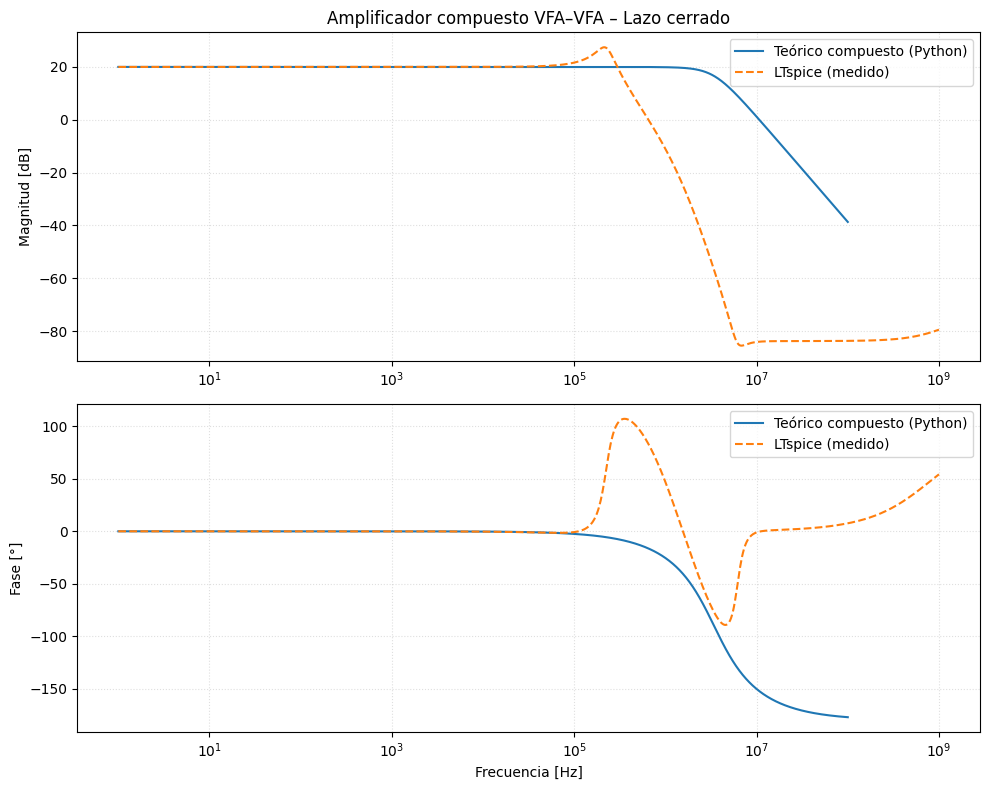

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================
#  Modelo LM324 (2 polos)
# ==========================
A0 = 1e5          # ganancia DC
f1 = 10           # Hz
f2 = 5.06e6       # Hz
w1 = 2*np.pi*f1
w2 = 2*np.pi*f2

# Barrido de frecuencias
f = np.logspace(0, 8, 2000)   # 1 Hz ... 100 MHz
w = 2*np.pi*f
s = 1j*w

# Lazo abierto de UN LM324
A_ol = A0 / ((1 + s/w1) * (1 + s/w2))

# ==========================
#  Parámetros del circuito
# ==========================
Ri = 10e3
Rf = 90e3
R1 = 1e3
R2 = 22e3

beta = Ri / (Ri + Rf)         # realimentación global (no inversor)
G2 = 1 + R2/R1                # ganancia local del segundo AO

# Bloque de lazo y lazo cerrado del compuesto
G_comp = G2 * A_ol
A_cl_comp = G_comp / (1 + beta * G_comp)

mag_comp = 20*np.log10(np.abs(A_cl_comp))
phase_comp = np.angle(A_cl_comp, deg=True)

# ==========================
#  Datos LTspice (formato: Freq   Re,Im)
# ==========================
freq_meas = []
re_meas = []
im_meas = []

with open("amp_vfa_vfa2.txt", "r") as f_lt:
    next(f_lt)  # saltar línea de encabezado: "Freq.   V(vout)"
    for line in f_lt:
        line = line.strip()
        if not line:
            continue
        parts = line.split()
        if len(parts) < 2:
            continue

        # columna 1: frecuencia
        f_val = float(parts[0])

        # columna 2: "Re,Im"
        comp_str = parts[1]
        re_str, im_str = comp_str.split(',')
        re_val = float(re_str)
        im_val = float(im_str)

        freq_meas.append(f_val)
        re_meas.append(re_val)
        im_meas.append(im_val)

freq_meas = np.array(freq_meas)
re_meas = np.array(re_meas)
im_meas = np.array(im_meas)

vout_c = re_meas + 1j*im_meas
mag_meas = 20*np.log10(np.abs(vout_c))
phase_meas = np.angle(vout_c, deg=True)

# ==========================
#  Gráfico Bode
# ==========================
plt.figure(figsize=(10,8))

# Módulo
plt.subplot(2,1,1)
plt.semilogx(f, mag_comp, label='Teórico compuesto (Python)')
plt.semilogx(freq_meas, mag_meas, '--', label='LTspice (medido)')
plt.ylabel('Magnitud [dB]')
plt.title('Amplificador compuesto VFA–VFA – Lazo cerrado')
plt.grid(True, which='both', ls=':', alpha=0.4)
plt.legend()

# Fase
plt.subplot(2,1,2)
plt.semilogx(f, phase_comp, label='Teórico compuesto (Python)')
plt.semilogx(freq_meas, phase_meas, '--', label='LTspice (medido)')
plt.ylabel('Fase [°]')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True, which='both', ls=':', alpha=0.4)
plt.legend()

plt.tight_layout()
plt.show()
